In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from process_results.results_utils import DATASETS, DEFAULT_METRIC, to_dataframe, make_plots

def plot_heatmap(df):
    df["score_str"] =  df.best_metric.map(lambda x: f"{x*100:.1f}\n") + df.last3_mean.map(lambda x: f"{x*100:.1f}") + df.last3_std.map(lambda x: f" ± {x*100:.1f}")
    sns.heatmap(df.pivot("lr","batch_size","best_metric"), annot=df.pivot("lr","batch_size","score_str"),fmt="")
    plt.show()

def logfile_paths(dataset):
    return glob.glob(f"../../checkpoints/finetune/bert_base/{dataset}/**/log",recursive=True)

# for dataset in DATASETS:
#     for logfile in logfile_paths(dataset):
#         df = to_dataframe(logfile, metric=DEFAULT_METRIC[dataset])
#         plot_heatmap(df)

/local/scratch-3/fwe21/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
for dataset in DATASETS:
    score = to_dataframe(logfile_paths(dataset)[0], metric=DEFAULT_METRIC[dataset])["best_metric"].max()
    print(f"{dataset}: {score}")

QNLI: 0.9125022888183594
RTE: 0.7111913561820984
SST-2: 0.9346330275229358
MRPC: 0.8853135704994202
MNLI: 0.8472746014595032
QQP: 0.9093989729881287
CoLA: 0.5942589044570923


QNLI
0.9125022888183594 ../../checkpoints/finetune/bert_base/QNLI/log


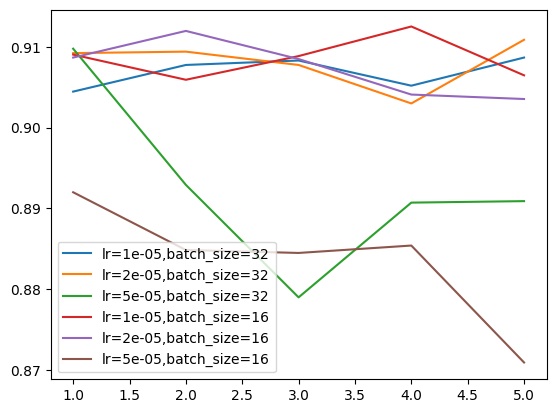

RTE
0.7111913561820984 ../../checkpoints/finetune/bert_base/RTE/log


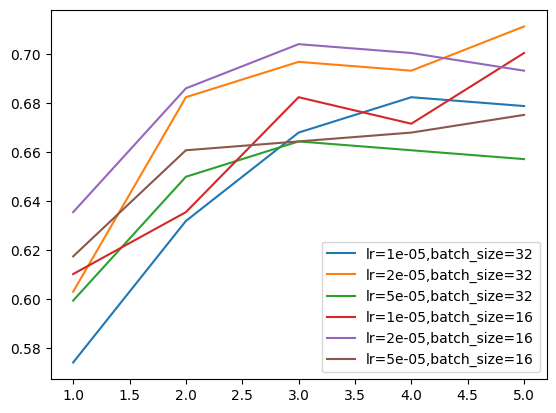

SST-2
0.9346330275229358 ../../checkpoints/finetune/bert_base/SST-2/log


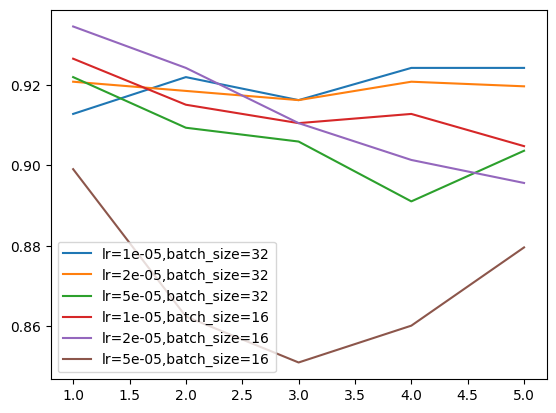

MRPC
0.8853135704994202 ../../checkpoints/finetune/bert_base/MRPC/log


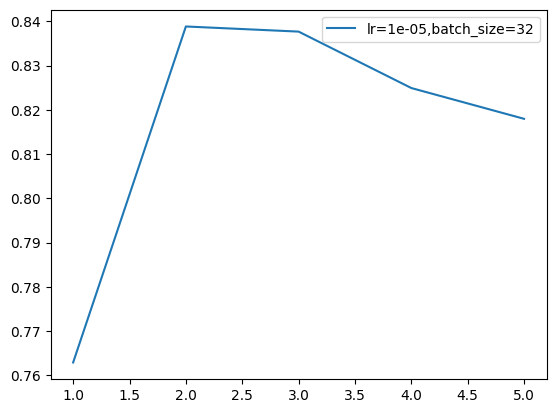

0.8820179104804993 ../../checkpoints/finetune/bert_base/MRPC/log_rp_2023-04-25_20:25:59


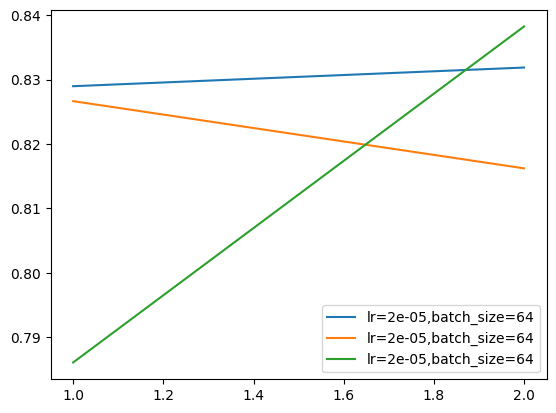

0.8863543272018433 ../../checkpoints/finetune/bert_base/MRPC/log_hp_2023-04-25_20:25:59


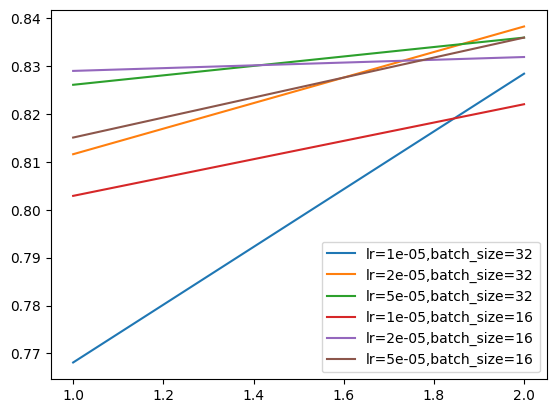

MNLI
0.8472746014595032 ../../checkpoints/finetune/bert_base/MNLI/log


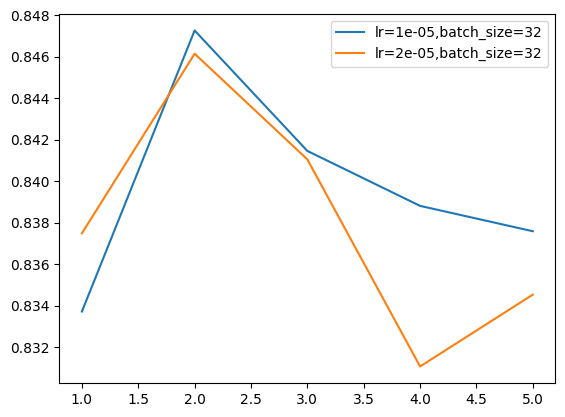

QQP
0.9093989729881287 ../../checkpoints/finetune/bert_base/QQP/log


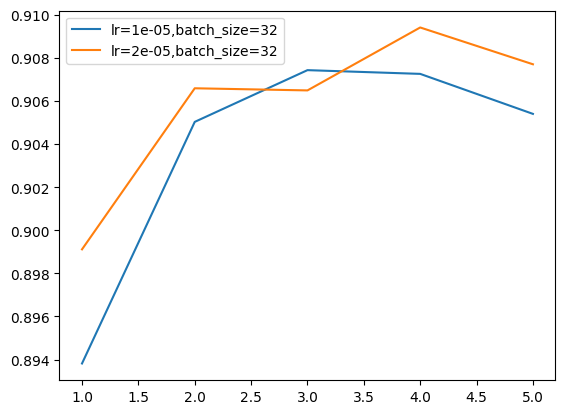

CoLA
0.5942589044570923 ../../checkpoints/finetune/bert_base/CoLA/log


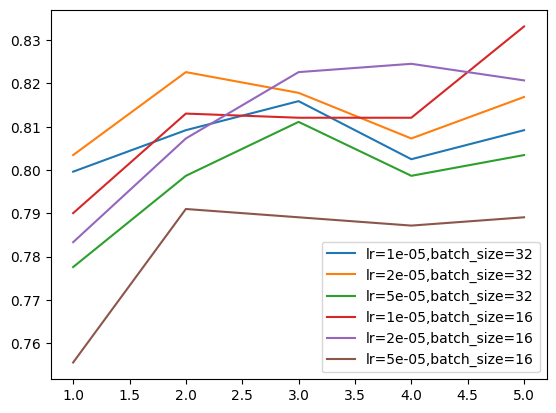

In [3]:
dataset="MRPC"
for dataset in DATASETS:
    print(dataset)
    for logfile in glob.glob(f"../../checkpoints/finetune/bert_base/{dataset}/log*"):
        df = to_dataframe(logfile, metric=DEFAULT_METRIC[dataset])
        print(df["best_metric"].max(),logfile)
        make_plots(logfile)